# Flights Data Exploration 
## by Ahunanya Obinna

### Prelimenary Wrangling

This documents explores a dataset containing flight information for over 1600 flight schedules

In [1]:
#Importing packages required for this analysis

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loadinng dataset into pandas dataframe and exploring statistics

df = pd.read_csv('airline_delays.csv')

In [5]:
#making a copy of the data

flights = df.copy()


In [7]:
# overview of data shape and composition

print(flights.shape)
print(flights.dtypes)
flights.head()

(1651, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2020,4,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",47.0,5.0,1.78,0.00,...,0.00,6.0,0.0,172.0,104.0,0.0,68.0,0.0,0.0,NaN
1,2020,4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",86.0,4.0,1.97,0.00,...,0.93,15.0,0.0,277.0,180.0,0.0,35.0,0.0,62.0,NaN
2,2020,4,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",1.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2020,4,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1314.0,56.0,36.33,2.45,...,9.33,288.0,1.0,4619.0,3437.0,251.0,270.0,0.0,661.0,NaN
4,2020,4,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",1.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [8]:
flights.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

#### Investigation Overview

The dataset has been loaded into a dataframe revealing 1651 flight schedules with 22 variables, I am particularly interested in delays affecting carriers. The main features of interest to me in this dataset are month, carrier_name, arr_flights, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay and late_aircraft_delay.

Features in this dataset that would play a key role in support of this investigation are arr_delay, carrier_delay, weather_delay, nas_delay, security_delay and late_aircraft_delay.

In [12]:
#checking for null values
flights.isna().sum()

year                      0
 month                    0
carrier                   0
carrier_name              0
airport                   0
airport_name              0
arr_flights              29
arr_del15               162
carrier_ct               29
 weather_ct              29
nas_ct                   29
security_ct              29
late_aircraft_ct         29
arr_cancelled            29
arr_diverted             29
 arr_delay               29
 carrier_delay           29
weather_delay            29
nas_delay                29
security_delay           29
late_aircraft_delay      29
Unnamed: 21            1651
dtype: int64

In [14]:
#Removing spaces from column names and ensuring all letters are in lowercase
flights.rename(columns = lambda x: x.strip().lower(), inplace = True)

In [18]:
#Defining columns to be kept
needed_cols = ['month', 'carrier_name', 'arr_flights', 'arr_delay', 'carrier_delay', 'weather_delay',
               'nas_delay', 'security_delay', 'late_aircraft_delay']

In [19]:
#Defining columns to be dropped
not_needed_cols = flights.columns.difference(needed_cols)

In [20]:
#viewing columns to be dropped, ensuring non is left out
not_needed_cols

Index(['airport', 'airport_name', 'arr_cancelled', 'arr_del15', 'arr_diverted',
       'carrier', 'carrier_ct', 'late_aircraft_ct', 'nas_ct', 'security_ct',
       'unnamed: 21', 'weather_ct', 'year'],
      dtype='object')

In [21]:
#Dropping columns not needed for this analysis
flights.drop(columns = not_needed_cols, inplace = True)

In [23]:
#viewing new dataframe
flights.head()

,month,carrier_name,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,4,Endeavor Air Inc.,47.0,172.0,104.0,0.0,68.0,0.0,0.0
1,4,Endeavor Air Inc.,86.0,277.0,180.0,0.0,35.0,0.0,62.0
2,4,Endeavor Air Inc.,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Endeavor Air Inc.,1314.0,4619.0,3437.0,251.0,270.0,0.0,661.0
4,4,Endeavor Air Inc.,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#checking for null values
flights.isna().sum()

month                   0
carrier_name            0
arr_flights            29
arr_delay              29
carrier_delay          29
weather_delay          29
nas_delay              29
security_delay         29
late_aircraft_delay    29
dtype: int64

In [30]:
#Dropping rows with null values
flights = flights[~(flights['arr_flights'].isna())]

In [33]:
flights.head()

,month,carrier_name,arr_flights,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,4,Endeavor Air Inc.,47.0,172.0,104.0,0.0,68.0,0.0,0.0
1,4,Endeavor Air Inc.,86.0,277.0,180.0,0.0,35.0,0.0,62.0
2,4,Endeavor Air Inc.,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Endeavor Air Inc.,1314.0,4619.0,3437.0,251.0,270.0,0.0,661.0
4,4,Endeavor Air Inc.,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
flights.shape

(1622, 9)

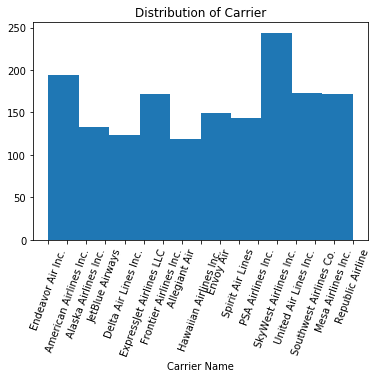

In [344]:
#distribution of carrier names
plt.hist(data = flights, x = 'carrier_name')
plt.title('Distribution of Carrier')
plt.xlabel('Carrier Name')
plt.xticks(rotation = 70);

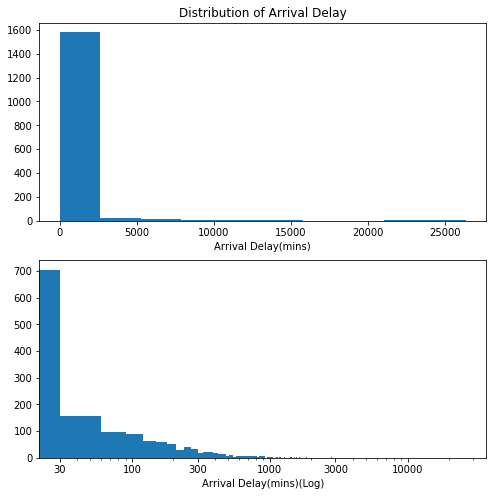

In [343]:
#Distribution of arrival delay
plt.figure(figsize = [8, 8])
plt.subplot(2, 1, 1)
plt.hist(data = flights, x = 'arr_delay')
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay(mins)')

plt.subplot(2, 1, 2)
bins = np.arange(0, flights['arr_delay'].max()+30,30)
plt.hist(data = flights, x = 'arr_delay', bins = bins)
plt.xscale('log')
plt.xlabel('Arrival Delay(mins)(Log)')
plt.xticks([30, 100, 300, 1000, 3000, 10000], [30, 100, 300, 1000, 3000, 10000]);

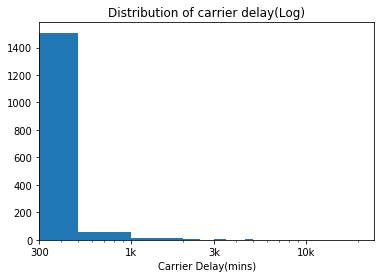

In [338]:
#Distribution of carrier delay
bins = np.arange(0, flights['carrier_delay'].max()+500,500)
plt.hist(data = flights, x = 'carrier_delay', bins = bins)
plt.title('Distribution of carrier delay(Log)')
plt.xlabel('Carrier Delay(mins)')
plt.xscale('log')
plt.xticks([300, 1000, 3000, 10000], [300, '1k', '3k', '10k']);


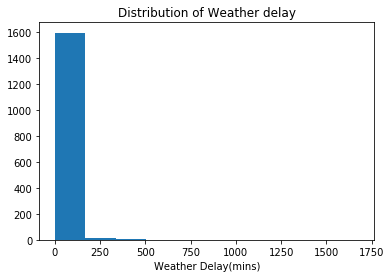

In [331]:
plt.hist(data = flights, x = 'weather_delay')
plt.title('Distribution of Weather delay')
plt.xlabel('Weather Delay(mins)');

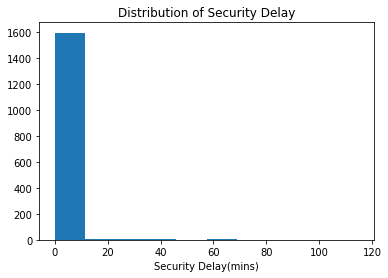

In [329]:
plt.hist(data = flights, x = 'security_delay')
plt.title('Distribution of Security Delay')
plt.xlabel('Security Delay(mins)');

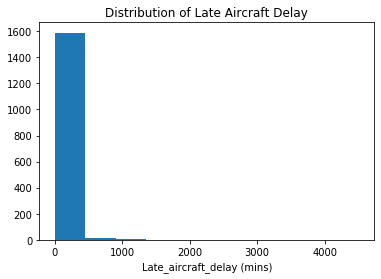

In [327]:
plt.hist(data = flights, x = 'late_aircraft_delay')
plt.title('Distribution of Late Aircraft Delay')
plt.xlabel('Late_aircraft_delay (mins)');

In [83]:
flights['late_aircraft_delay'].describe()

count    1622.000000
mean       54.575832
std       263.422712
min         0.000000
25%         0.000000
50%         0.000000
75%        13.000000
max      4510.000000
Name: late_aircraft_delay, dtype: float64

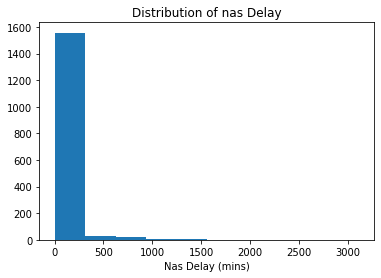

In [328]:
plt.hist(data = flights, x = 'nas_delay')
plt.title('Distribution of nas Delay')
plt.xlabel('Nas Delay (mins)');

Carrier_names seemed to be fairly distributed across the dataset with SkyWestAirlines Inc. having the widest distribution, a right-skewed distribution is observed for arrival delay which tails off at 1000, a log transformation was plotted to get a closer view at the distribution, carrier_delay, weather_delay, nas_delay, security_delay and late_aircraft_delay all have high figure outlier which skews the distribution to the right, lower variable values having the most frequency accross all types of delays than higher variable values.

Rows with null values for the delay variables were dropped to ensure the data contained non null values.

# Bivariate Exploration

We will be looking at how the all 6 delay variables correlate with one another, variables with a high correlation coefficient would be focused on.

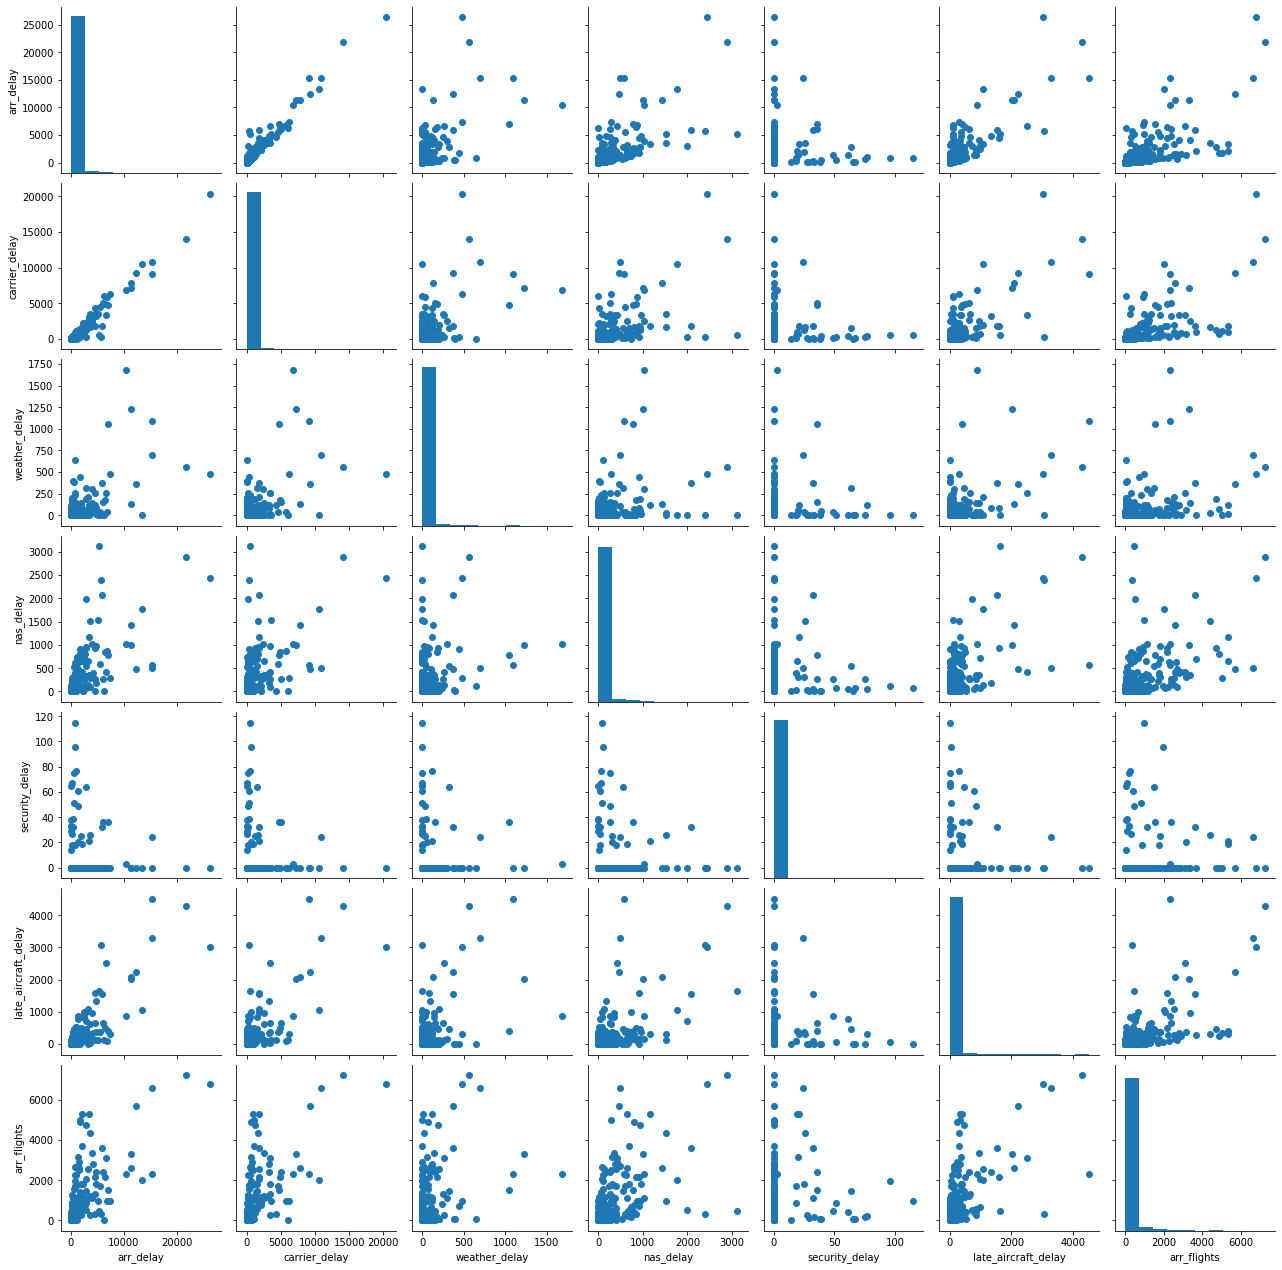

In [323]:
g = sb.PairGrid(data = flights, vars = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
                                  'late_aircraft_delay', 'arr_flights'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [186]:
num_vars = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
                                  'late_aircraft_delay', 'arr_flights']

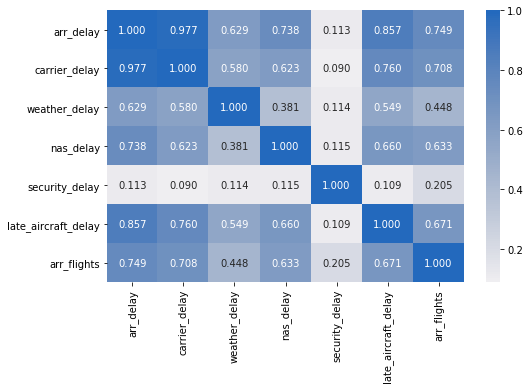

In [187]:
plt.figure(figsize = [8, 5])
sb.heatmap(flights[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

The matrix and heat map reveal very interesting relationship between certain variables, arrival delay and carrier delay show very strong correlation, arrival delay and late aircraft delay also show strong correlation, other variables that show fairly strong correlation are nas_delay against arr_delay,  carrier_delay against late_aircraft_delay, weather_delay against arr_delay. These strongly correlated variables would be investigated further to get a closer look at their relationships.

My focus would be on the carriers that suffers the worst delay, which takes the exploration to plotting carrier_name against the selected delay variable.

arr_flights does not seem to show very strong correlation between other variables aside a fairly strong correlation with arrival delay and carrier delay.

In [380]:
def plot_scatter(df, x, y):
    '''This function plots a scatter graph.
    It takes 3 parameters, df is a dataframe,
    'x' and 'y' parameters are columns of the dataframe
    '''
    plt.figure(figsize =[8, 5])
    plt.scatter(data = df, x = x, y = y, alpha = 1/3)
    plt.xlabel('{}(mins)'.format(x))
    plt.ylabel('{}(mins)'.format(y))

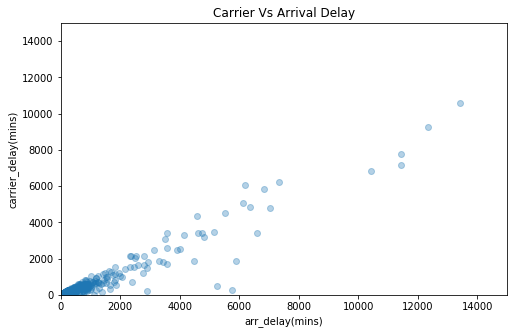

In [382]:
plot_scatter(flights, 'arr_delay', 'carrier_delay')
plt.xlim(0,15000)
plt.ylim(0,15000)
plt.title('Carrier Vs Arrival Delay');

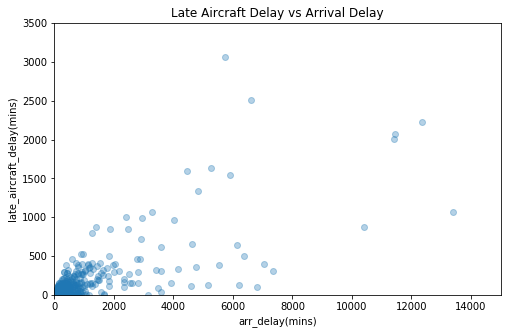

In [381]:
plot_scatter(flights, 'arr_delay', 'late_aircraft_delay')
plt.xlim(0, 15000)
plt.ylim(0, 3500)
plt.title('Late Aircraft Delay vs Arrival Delay');

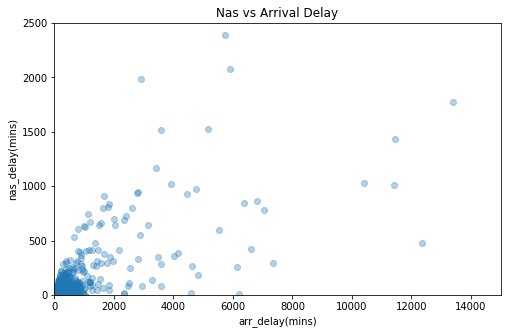

In [383]:
plot_scatter(flights,'arr_delay', 'nas_delay')
plt.xlim(0, 15000)
plt.ylim(0, 2500)
plt.title('Nas vs Arrival Delay');

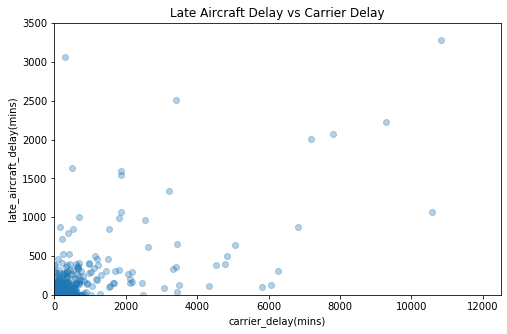

In [384]:
plot_scatter(flights, 'carrier_delay', 'late_aircraft_delay')
plt.xlim(0, 12500)
plt.ylim(0, 3500)
plt.title('Late Aircraft Delay vs Carrier Delay');

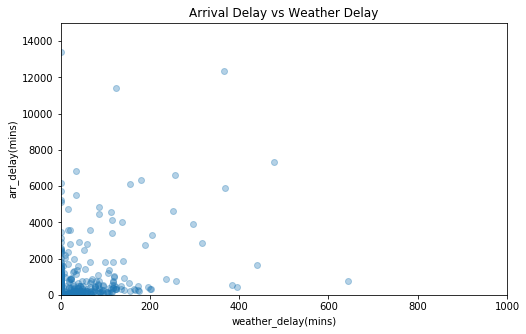

In [385]:
plot_scatter(flights, 'weather_delay', 'arr_delay')
plt.xlim(0, 1000)
plt.ylim(0, 15000)
plt.title('Arrival Delay vs Weather Delay');

The use of transperancy was implored in the scatter plot to show a clearer picture initially hampered by over plotting of variables, the result is an affirmation of what was already revealed by the matrix plotted previously. 

Arrival delay and carrier delay show very strong correlation, likewise arrival delay and late_aircraft_delay, there is a fairly strong correlation between nas delay and arrival delay, as well as carrier delay and late_aircraft_delay, weather delay and arrival delay show a fairly strong correlation.

In [362]:
def plot_barplot(df, x, y, order):
    '''This function takes 4 parameters and plots a barplot.
    The first parameter is a dataframe, 'x' and 'y' parameters
    are columns of the dataframe, 'order' is an index of mean variable,
    grouped by 'carrier_name' column of the dataframe
    '''
    base_color = sb.color_palette()[0]
    sb.barplot(data = df, x = x, y = y, color = base_color,  order = order)
    plt.xticks(rotation = 70)
    plt.xlabel(x)
    plt.ylabel(y)

In [203]:
arr_mean = flights.groupby(['carrier_name'])['arr_delay'].mean()
arr_order = arr_mean.sort_values(ascending = False).index

In [262]:
arr_mean.sum()

5272.9648859604085

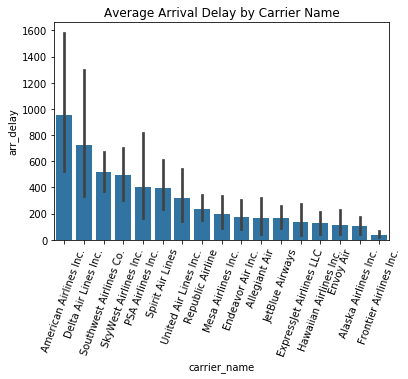

In [365]:
plot_barplot(flights, 'carrier_name', 'arr_delay', arr_order)
plt.title('Average Arrival Delay by Carrier Name');

In [206]:
carrier_mean = flights.groupby(['carrier_name'])['carrier_delay'].mean()
carrier_order = carrier_mean.sort_values(ascending = False).index

In [263]:
carrier_mean.sum()

3334.7620491397115

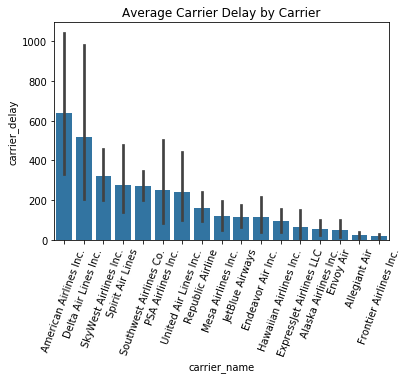

In [366]:
plot_barplot(flights, 'carrier_name', 'carrier_delay', carrier_order)
plt.title('Average Carrier Delay by Carrier');

In [208]:
nas_mean = flights.groupby(['carrier_name'])['nas_delay'].mean()
nas_order = nas_mean.sort_values(ascending = False).index

In [264]:
nas_mean.sum()

847.0142698572926

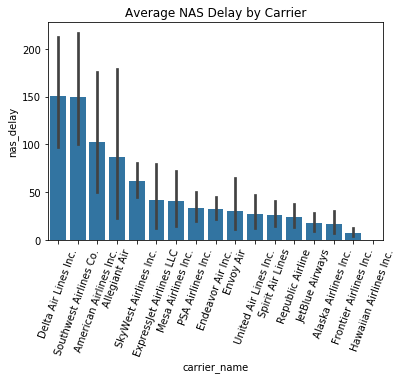

In [367]:
plot_barplot(flights, 'carrier_name', 'nas_delay', nas_order)
plt.title('Average NAS Delay by Carrier');

In [214]:
late_mean = flights.groupby(['carrier_name'])['late_aircraft_delay'].mean()
late_order = late_mean.sort_values(ascending = False).index

In [265]:
late_mean.sum()

873.7679389047752

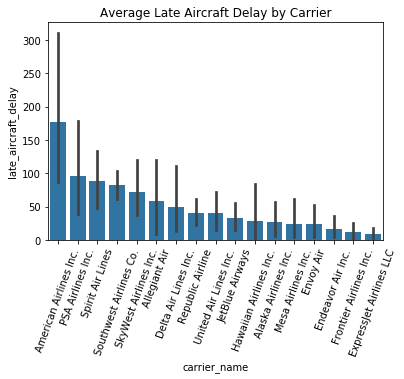

In [368]:
plot_barplot(flights, 'carrier_name', 'late_aircraft_delay', late_order)
plt.title('Average Late Aircraft Delay by Carrier');

In [200]:
mean_weather = flights.groupby(['carrier_name'])['weather_delay'].mean()
weather_order = mean_weather.sort_values(ascending = False).index

In [267]:
mean_weather.sum()

204.76385284811622

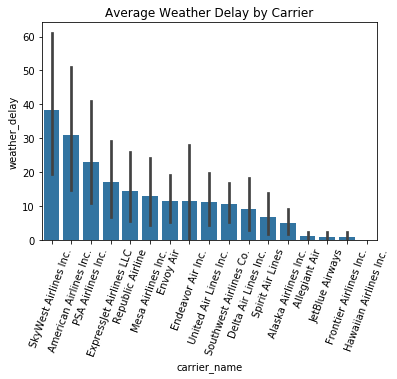

In [369]:
plot_barplot(flights, 'carrier_name', 'weather_delay', weather_order)
plt.title('Average Weather Delay by Carrier');

In [212]:
security_mean = flights.groupby(['carrier_name'])['security_delay'].mean()
security_order = security_mean.sort_values(ascending = False).index

In [268]:
security_mean.sum()

12.656775210514162

Text(0.5, 1.0, 'Average Security Delay vs Carrier Name')

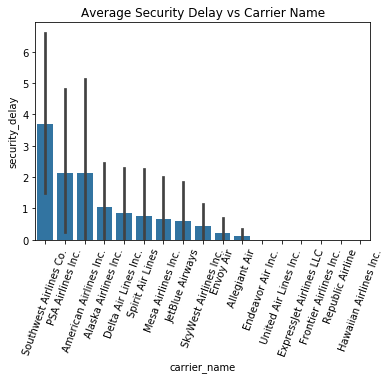

In [359]:
plot_barplot(flights, 'carrier_name', 'security_delay', security_order)
plt.title('Average Security Delay vs Carrier Name')

From the average barplot, it is clear that arrival delay has the highest impact on carriers with an average sum of 5272 mins of delay across carriers, next to 'carrier delay' accounting for an average of of 3334 mins of delay, followed by 'late_aircraft_delay'(873 mins), next to nas_delay(847 mins), 'weather_delay' and 'security_delay' with the least impact accounting for 204mins and 12mins of average sum respectively.

Carriers that show up as top 3 across all 6 delay variables are 'American Airlines Inc.' with a count of 6, 'PSA Airlines Inc' with a count of 3, 'Southwest Airlines Inc.' with a count of 3, 'Delta Air Lines Inc.' with a count of 3, 'SkyWest Airlines Inc.' with a count of 2, 'Spirit Air Lines' with a count of 1.

This shows that the carrier that suffers the most delay is the American Airlines Inc, with PSA, Southwest and Delta Airlines following right after.

In [93]:
flights['carrier_name'].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines LLC', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.', 'Envoy Air',
       'Spirit Air Lines', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline'], dtype=object)

In [271]:
carrier_4 = flights.loc[flights['carrier_name'].isin(['American Airlines Inc.', 'SkyWest Airlines Inc.',
                                                      'Delta Air Lines Inc.', 'Southwest Airlines Co.'])]

In [372]:
def plot_color_graph(df, x, y, hue):
    '''This function plots a FacetGrid color graph.
    It takes 4 parameters, 'df' is a dataframe with rows and columns,
    'x', 'y' and 'hue' parameters are columns of the dataframe.
    '''
    g = sb.FacetGrid(data = df, hue = hue, size = 5, palette = 'colorblind')
    g.map(plt.scatter, x, y)
    g.add_legend(title = 'Carrier Name')

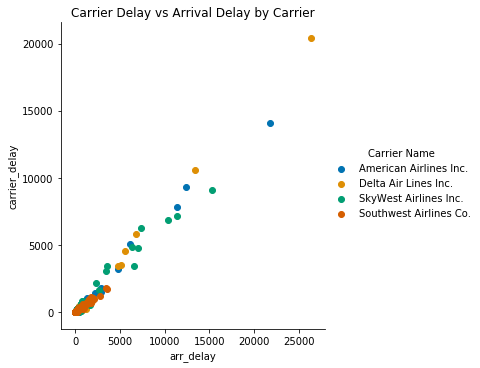

In [373]:
plot_color_graph(carrier_4, 'arr_delay', 'carrier_delay', 'carrier_name')
plt.title('Carrier Delay vs Arrival Delay by Carrier');

This plot shows carriers are strongly affected by carrier and arrival delays

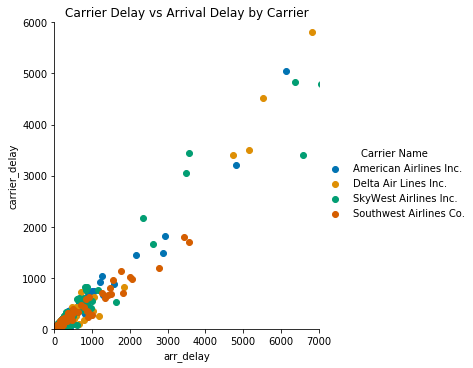

In [375]:
plot_color_graph(carrier_4, 'arr_delay', 'carrier_delay', 'carrier_name')
plt.xlim(0, 7000)
plt.ylim(0, 6000)
plt.title('Carrier Delay vs Arrival Delay by Carrier');

Zooming in on the clusterred plots to gain clearer insights on plot interraction re affirms delays have a very strong impact on carriers.

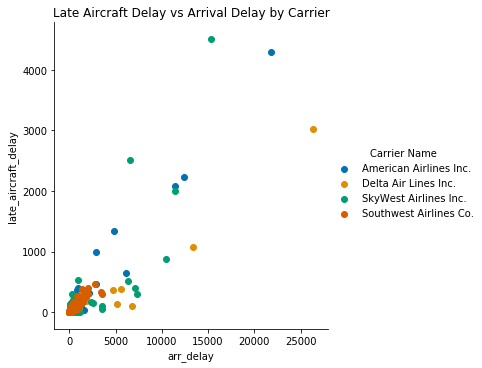

In [376]:
plot_color_graph(carrier_4, 'arr_delay', 'late_aircraft_delay', 'carrier_name')
plt.title('Late Aircraft Delay vs Arrival Delay by Carrier');

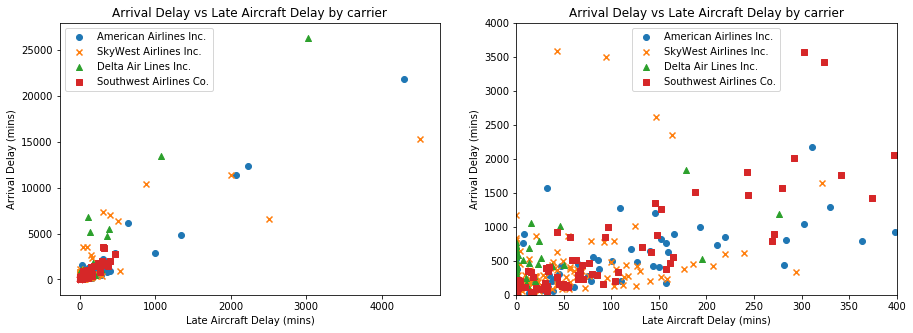

In [279]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
cat_markers = [['American Airlines Inc.', 'o'],
               ['SkyWest Airlines Inc.', 'x'],
              ['Delta Air Lines Inc.', '^' ],
              ['Southwest Airlines Co.', 's']]

for cat, marker in cat_markers:
    df_cat = flights[flights['carrier_name'] == cat]
    plt.scatter(data = df_cat, x = 'late_aircraft_delay', y = 'arr_delay', marker = marker)
    plt.xlabel('Late Aircraft Delay (mins)')
    plt.ylabel('Arrival Delay (mins)')
    plt.title('Arrival Delay vs Late Aircraft Delay by carrier')

plt.legend(['American Airlines Inc.', 'SkyWest Airlines Inc.', 'Delta Air Lines Inc.', 'Southwest Airlines Co.'])

plt.subplot(1, 2, 2)
cat_markers = [['American Airlines Inc.', 'o'],
               ['SkyWest Airlines Inc.', 'x'],
              ['Delta Air Lines Inc.', '^' ],
              ['Southwest Airlines Co.', 's']]

for cat, marker in cat_markers:
    df_cat = flights[flights['carrier_name'] == cat]
    plt.scatter(data = df_cat, x = 'late_aircraft_delay', y = 'arr_delay', marker = marker)
    plt.xlim(0, 400)
    plt.ylim(0, 4000)
    plt.xlabel('Late Aircraft Delay (mins)')
    plt.ylabel('Arrival Delay (mins)')
    plt.title('Arrival Delay vs Late Aircraft Delay by carrier')

plt.legend(['American Airlines Inc.', 'SkyWest Airlines Inc.', 'Delta Air Lines Inc.', 'Southwest Airlines Co.']);

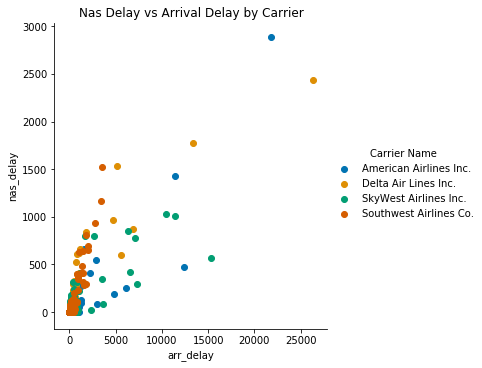

In [377]:
plot_color_graph(carrier_4, 'arr_delay', 'nas_delay', 'carrier_name')
plt.title('Nas Delay vs Arrival Delay by Carrier');

The impact on carrier as shown by the plot is fairly strong

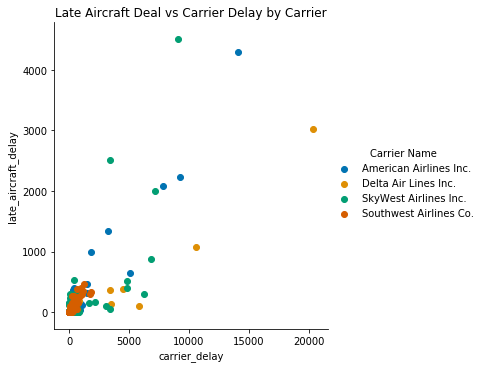

In [378]:
plot_color_graph(carrier_4, 'carrier_delay', 'late_aircraft_delay', 'carrier_name')
plt.title('Late Aircraft Deal vs Carrier Delay by Carrier');

C:\Users\OB_411\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


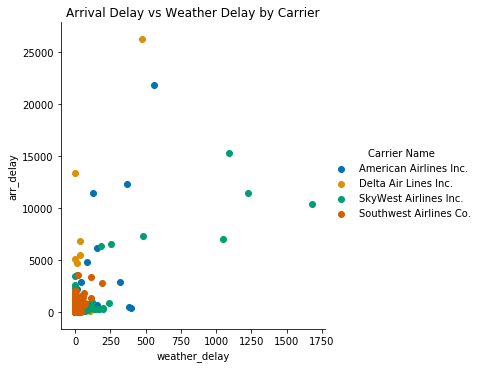

In [371]:
plot_color_graph(carrier_4, 'weather_delay', 'arr_delay', 'carrier_name')
plt.title('Arrival Delay vs Weather Delay by Carrier');

Plotting a graph using color and shape encoding for four carrier_names (American Airlines Inc., Skywest Airline Inc, Delta Airline Inc., Southwest Airlines Inc.) affected the most by delays, showed how various combinations of delays impacted on these carriers. 


It is quite surprising weather_delay did not have a very strong impact on carrier as I expected.

I have therefor concluded from the plot that arrival delay and carrier delay have the strongest impact on carriers, clearly revealed by the interraction from the color scatter plot.

American Airlines Inc., suffering the higehest delay largely due to arrival and carrier delays.